In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from hmmlearn import hmm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Step 1: Load the processed dataset
df = pd.read_csv("enhanced_dataset.csv")

In [5]:
# Step 2: Split Data into Training and Testing Sets
X = df[['FlightTime', 'KeyHoldTime', 'TypingSpeed', 'KeySequenceChangeRate',
    'InterKeyInterval_Mean', 'InterKeyInterval_Std', 'Burstiness',
    'TransitionEntropy', 'HMM_LogLikelihood_PerUser', 'HMM_HiddenState',
    'HMM_HiddenState_TransitionCount', 'HMM_HiddenState_Duration',
    'TimeSinceLastKeyPress', 'AvgSessionLength', 'KeyEncoded']]
y = df['DeviceId']  # Assuming DeviceId represents unique users for authentication
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Step 3: Train Multiple Machine Learning Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Support Vector Machine": SVC(kernel='linear', probability=True),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(50,50), max_iter=500, random_state=42)
}


In [7]:
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))

Logistic Regression Accuracy: 1.0000
              precision    recall  f1-score   support

      6PREUN       1.00      1.00      1.00       992
      7RHSM5       1.00      1.00      1.00       581

    accuracy                           1.00      1573
   macro avg       1.00      1.00      1.00      1573
weighted avg       1.00      1.00      1.00      1573

Random Forest Accuracy: 1.0000
              precision    recall  f1-score   support

      6PREUN       1.00      1.00      1.00       992
      7RHSM5       1.00      1.00      1.00       581

    accuracy                           1.00      1573
   macro avg       1.00      1.00      1.00      1573
weighted avg       1.00      1.00      1.00      1573

Support Vector Machine Accuracy: 1.0000
              precision    recall  f1-score   support

      6PREUN       1.00      1.00      1.00       992
      7RHSM5       1.00      1.00      1.00       581

    accuracy                           1.00      1573
   macro avg       1

In [8]:
# Step 4: Display Model Comparison
print("Model Comparison:")
print(results)

Model Comparison:
{'Logistic Regression': 1.0, 'Random Forest': 1.0, 'Support Vector Machine': 1.0, 'Neural Network': 0.9427844882390337}


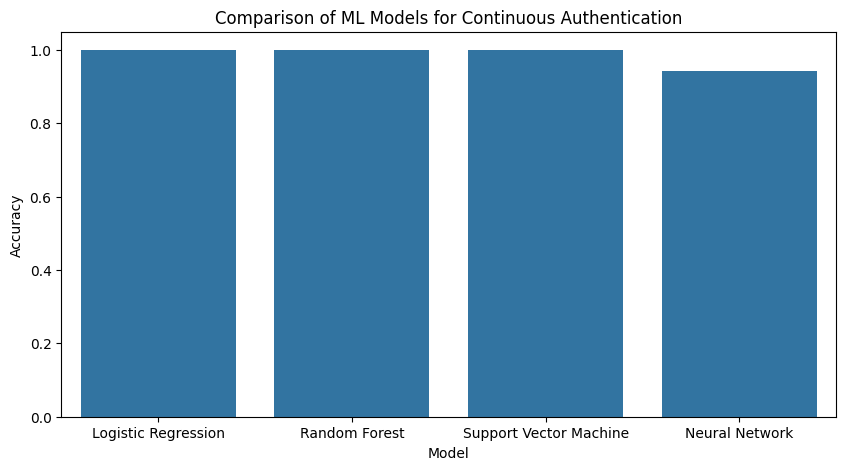

In [9]:
# Step 5: Plot Model Performance
plt.figure(figsize=(10, 5))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Comparison of ML Models for Continuous Authentication")
plt.show()